# HTMLファイルの読み込み検証

受領した各社のHTMLファイルが読み込めるかを検証する。

In [16]:
import sys
import dataclasses
from pathlib import Path
if "../" not in sys.path:
    sys.path.append("../")
import pandas as pd
from scripts.financial_result_to_dataframe import financial_result_to_dataframe

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
data_dir = Path.cwd().joinpath("../data/raw/HTML")
company_dfs = {}
read_results = []

for dir in data_dir.iterdir():
    company_name = dir.name
    html_path = dir.joinpath("qualitative.htm")
    df, result = financial_result_to_dataframe(html_path)
    _result = dataclasses.asdict(result)
    for key in _result:
        _result[key] = 1 if _result[key] else 0
    _result["company_name"] = company_name
    company_dfs[company_name] = df
    read_results.append(_result)

read_result_df = pd.DataFrame(read_results).set_index("company_name")

<AxesSubplot:ylabel='None'>

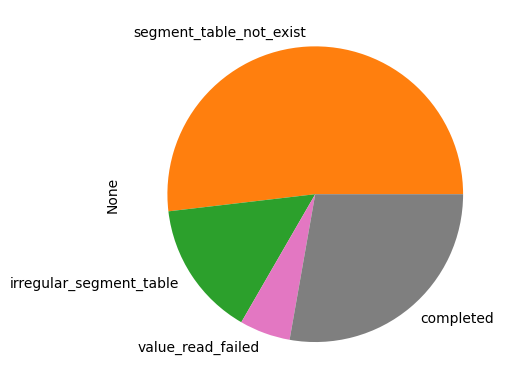

In [19]:
read_result_df.sum().plot.pie()

In [23]:
read_result_df.sum()

read_html_failed            0
segment_table_not_exist    28
irregular_segment_table     8
period_not_found            0
segment_not_found           0
account_not_found           0
value_read_failed           3
completed                  15
dtype: int64

In [20]:
read_result_df[read_result_df.completed == 1]

,read_html_failed,segment_table_not_exist,irregular_segment_table,period_not_found,segment_not_found,account_not_found,value_read_failed,completed
company_name,,,,,,,,
オリンパス,0,0,0,0,0,0,0,1
セブン＆アイ・ホールディングス,0,0,0,0,0,0,0,1
トレイダーズホールディングス,0,0,0,0,0,0,0,1
ビックカメラ,0,0,0,0,0,0,0,1
マルハニチロ,0,0,0,0,0,0,0,1
ヨネックス,0,0,0,0,0,0,0,1
リンナイ,0,0,0,0,0,0,0,1
三和ホールディングス,0,0,0,0,0,0,0,1
三菱商事,0,0,0,0,0,0,0,1


In [21]:
company_dfs["セブン＆アイ・ホールディングス"].to_csv("sample.csv", index=False)

In [25]:
read_result_df[read_result_df.irregular_segment_table == 1]

,read_html_failed,segment_table_not_exist,irregular_segment_table,period_not_found,segment_not_found,account_not_found,value_read_failed,completed
company_name,,,,,,,,
あおぞら銀行,0,1,0,0,0,0,0,0
アドバンスト,0,1,0,0,0,0,0,0
イオン北海道,0,1,0,0,0,0,0,0
ウェザーニューズ,0,1,0,0,0,0,0,0
エーザイ,0,1,0,0,0,0,0,0
コジマ,0,1,0,0,0,0,0,0
サッポロホールディングス,0,1,0,0,0,0,0,0
シャープ,0,1,0,0,0,0,0,0
ソニー,0,1,0,0,0,0,0,0
